# Toy example of a two-dimensional data set in the input and feature space (fig. 4.1)
## Author: Alexander Gresch

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [16]:
path_to_colors = "../colors/"

In [17]:
# Import custom font
import matplotlib.font_manager as fm
from pathlib import Path
path = Path(r'../fonts/Hero New Regular.otf') # for text only

path_abc = Path(r'../fonts/Hero New Medium.otf') # for (a), (b), etc.
custom_font = fm.FontProperties(fname=path)
custom_font_abc = fm.FontProperties(fname=path_abc)

In [18]:
# Import colors (e.g., as 1D and dictionary)
import pickle

# Use colors as a dictionary
infile = open(path_to_colors+'colors_dict.pkl','rb')
colors_dict = pickle.load(infile)
infile.close()

# Import 1D array of colors
infile = open(path_to_colors+'colors_1D.pkl','rb')
colors_1D = pickle.load(infile)
infile.close()

In [19]:
# derandomized data generation
N = 100
r = np.random.RandomState(42)
radii = np.zeros((2,N))
for i,rrange in enumerate(([0.1,0.8],[1.2,1.9])):
    radii[i] = r.uniform(*rrange,size=N)
angles  = r.uniform(0,2*np.pi,size=(2,N))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
C:\Users\ankad\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide 

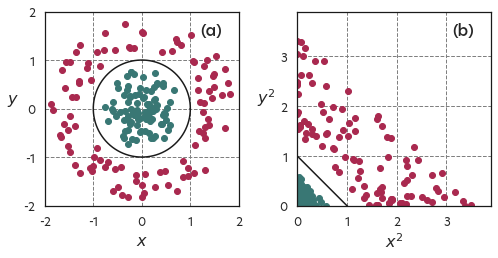

In [22]:
# Seaborn style set
sns.set(style="whitegrid", rc={'figure.figsize':(8,6)}) # in inches
sns.set_style("whitegrid", {'grid.linestyle': 'dashed', "grid.color": "0.5", 'axes.edgecolor': '.1'})

ax = plt.subplot(121)
for color,radius,angle in zip(colors_dict.values(),radii,angles):
    plt.scatter(radius*np.cos(angle),radius*np.sin(angle),c=color["dark"])
angle = np.linspace(0,2*np.pi,100)
plt.plot(np.cos(angle),np.sin(angle),"k-")
plt.xlim(-2,2)
plt.xticks(fontsize=11)
plt.xlabel("$x$",fontsize=16,fontproperties=custom_font)
#plt.xticks([])
plt.ylim(-2,2)
plt.yticks(fontsize=11)
plt.ylabel("$y$",fontsize=16,fontproperties=custom_font,rotation=0,ha="right")
plt.text(0.8,0.875,"(a)",fontsize=16,fontproperties=custom_font_abc,transform=ax.transAxes)
plt.yticks([-2,-1,0,1,2])
plt.gca().set_aspect('equal')

ax.set_yticklabels(ax.get_yticks().astype('int'), font=path, fontsize=12)
ax.set_xticklabels(ax.get_xticks().astype('int'), font=path, fontsize=12)

ax = plt.subplot(122)
for color,radius,angle in zip(colors_dict.values(),radii**2,angles):
    plt.scatter(radius*np.cos(angle)**2,radius*np.sin(angle)**2,c=color["dark"])
plt.plot([-1,2],[2,-1],"k-")
#plt.xlim(-0.1,1.9**2+0.1)
plt.xlim(0,3.9)
plt.xticks(fontsize=11)
plt.xlabel("$x^2$",fontsize=16,fontproperties=custom_font)
#plt.xticks([])
#plt.ylim(-0.1,1.9**2+0.1)
plt.ylim(0,3.9)
plt.yticks(fontsize=11)
plt.ylabel("$y^2$",fontsize=16,fontproperties=custom_font,rotation=0,ha="right") #,labelpad=-245
plt.text(0.8,0.875,"(b)",fontsize=16,fontproperties=custom_font_abc,transform=ax.transAxes)
plt.yticks([0,1,2,3])

ax.set_yticklabels(ax.get_yticks().astype('int'), font=path, fontsize=12)
ax.set_xticklabels(ax.get_xticks().astype('int'), font=path, fontsize=12)

plt.gca().set_aspect('equal')
plt.subplots_adjust(wspace=0.3)
plt.savefig("4.1_toy_example_corr.pdf",orientation="landscape",dpi=600,bbox_inches="tight")